In [1]:
pip install datasets


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from datasets import list_datasets

In [8]:
all_datasets = list_datasets()

/var/folders/cj/mgzm3jn17r9cnkj40l09dw280000gn/T/ipykernel_78433/374882858.py:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


In [9]:
print(f"There are {len(all_datasets)} datasets currently available on hub")

There are 95726 datasets currently available on hub


In [10]:
print(f"the first 10 are: {all_datasets[:10]}")

the first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [11]:
from datasets import load_dataset

In [12]:
emotions = load_dataset("emotion")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/datasets/load.py:1429: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [13]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [14]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [15]:
len(train_ds)

16000

In [16]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [17]:
train_ds.column_names

['text', 'label']

In [18]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [19]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [20]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [21]:
import pandas as pd

In [22]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [23]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [24]:
import matplotlib.pyplot as plt

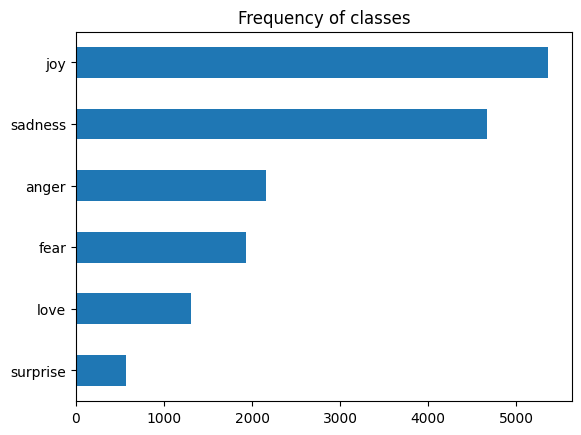

In [25]:
df["label_name"].value_counts(ascending = True).plot.barh()
plt.title("Frequency of classes")
plt.show()

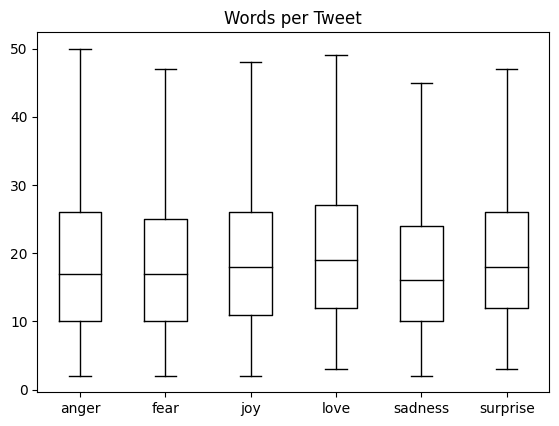

In [26]:
df["Words per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words per Tweet", by="label_name", grid=False, showfliers=False, color='black')
plt.suptitle("")
plt.xlabel("")
plt.show()

In [27]:
emotions.reset_format()

In [28]:
text = "Tokenizing text is a core task of NLP"
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P']


In [29]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, 'L': 1, 'N': 2, 'P': 3, 'T': 4, 'a': 5, 'c': 6, 'e': 7, 'f': 8, 'g': 9, 'i': 10, 'k': 11, 'n': 12, 'o': 13, 'r': 14, 's': 15, 't': 16, 'x': 17, 'z': 18}


In [30]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[4, 13, 11, 7, 12, 10, 18, 10, 12, 9, 0, 16, 7, 17, 16, 0, 10, 15, 0, 5, 0, 6, 13, 14, 7, 0, 16, 5, 15, 11, 0, 13, 8, 0, 2, 1, 3]


In [31]:
categorical_df = pd.DataFrame({
    "Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Lable ID": [0,1,2]
})
categorical_df

,Name,Lable ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [32]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [33]:
import torch
import torch.nn.functional as F

In [34]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([37, 19])

In [35]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 4
One-hot: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [36]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP']


In [37]:
from transformers import AutoTokenizer

In [38]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [39]:
encoded_text = tokenizer(text)

In [40]:
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [41]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '[SEP]']


In [42]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp [SEP]


In [43]:
tokenizer.vocab_size

30522

In [44]:
tokenizer.model_max_length

512

In [45]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [46]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [47]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [48]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [49]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [50]:
from transformers import AutoModel

In [51]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cude" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [52]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [53]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [54]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [55]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [56]:
def extract_hidden_states(batch):
    #place model inputs on th GPU, in my case "CPU"
    inputs = {k:v.to(device) for k, v in batch.items()
    if k in tokenizer.model_input_names}
    #extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    #return vector for [cls] token
        return{"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [57]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [60]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

In [62]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [63]:
import numpy as np

In [64]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [4]:
pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 5.3 MB/s eta 0:00:0000:0100:01
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=d977ac9a3386c7a791e50719887f334f3d1d5bdbd6dabceba65c7950c630bdd4
  Stored in directory: /Users/venugopalmiriyala/Library/Caches/pip/wheels/de/07/2e/814a6ee82e37528f2044a609a431028375b149bc31f03c0e27
Successfully built umap-learn

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [65]:
from umap.umap_ import UMAP
from sklearn.preprocessing import MinMaxScaler


In [66]:
#scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
#initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
#create a dataframe of 2d embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.366979,6.773426,0
1,-2.992917,5.826711,0
2,5.426632,2.944746,3
3,-2.171038,3.676946,2
4,-3.075577,3.784417,3


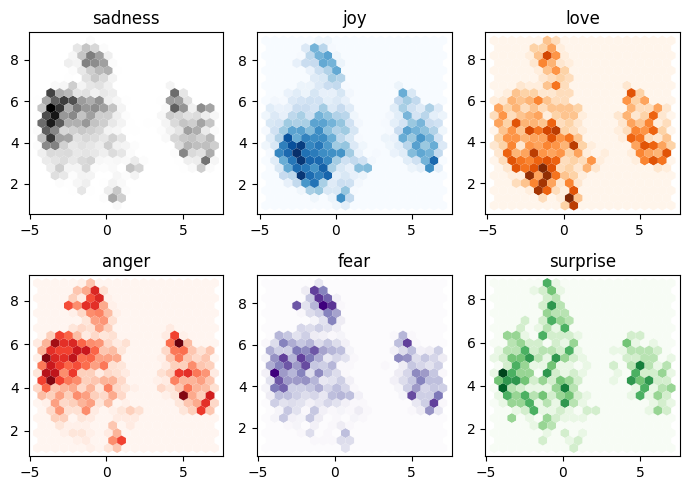

In [73]:
fig, axes = plt.subplots(2,3, figsize = (7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    
    
plt.tight_layout()
plt.show()

In [75]:
from sklearn.linear_model import LogisticRegression


In [78]:
#increase 'max_iter' to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

In [79]:
from sklearn.dummy import DummyClassifier

In [80]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [85]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

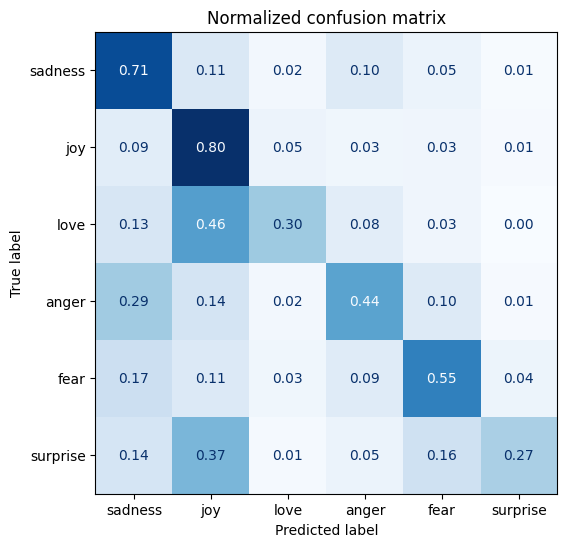

In [86]:
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [87]:
from transformers import AutoModelForSequenceClassification

In [88]:
num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.we

In [89]:
from sklearn.metrics import accuracy_score, f1_score

In [107]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels,preds)
    return {"accuracy": acc, "f1": f1}

In [93]:
from huggingface_hub import notebook_login

In [94]:
notebook_login()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [108]:
from transformers import Trainer, TrainingArguments

In [109]:
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                 log_level="error")

In [110]:
from transformers import Trainer

In [111]:
trainer = Trainer(model=model, args=training_args,
                 compute_metrics=compute_metrics,
                 train_dataset=emotions_encoded["train"],
                 eval_dataset=emotions_encoded["validation"],
                 tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.229400,0.175599,0.927500,0.927385
2,0.141800,0.160056,0.935500,0.935817


In [114]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [115]:
preds_output.metrics

{'test_loss': 0.1600562185049057,
 'test_accuracy': 0.9355,
 'test_f1': 0.9358170932190872,
 'test_runtime': 26.6481,
 'test_samples_per_second': 75.052,
 'test_steps_per_second': 1.201}

In [116]:
y_preds = np.argmax(preds_output.predictions, axis=1)

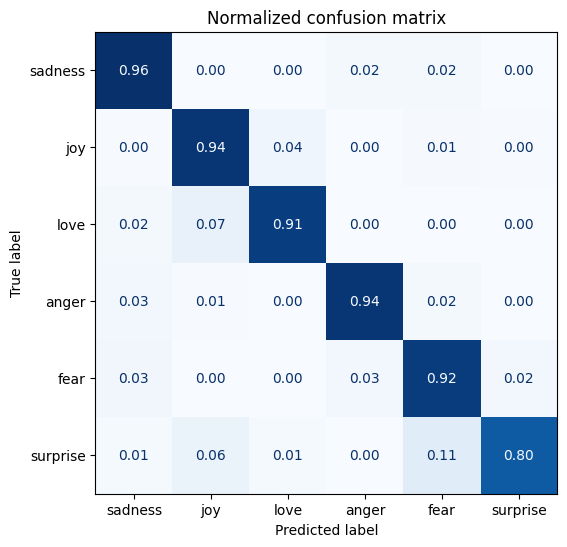

In [117]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [119]:
from torch.nn.functional import cross_entropy

In [123]:
def forward_pass_with_label(batch):
    #place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch['label'].to(device), reduction="none")
        #place outputs on cpu for compatibility with other dataset columns
        return {"loss": loss.cpu().numpy(),
               "predicted_label": pred_label.cpu().numpy()}

In [125]:
#convert our dataset back to pytorch tensors
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

#compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [126]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [127]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,7.454258
882,i feel badly about reneging on my commitment t...,love,sadness,7.147872
1801,i feel that he was being overshadowed by the s...,love,sadness,6.630569
1963,i called myself pro life and voted for perry w...,joy,sadness,6.494145
318,i felt ashamed of these feelings and was scare...,fear,sadness,5.676975
1509,i guess this is a memoir so it feels like that...,joy,fear,5.623485
1111,im lazy my characters fall into categories of ...,joy,fear,5.469373
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.181375
1836,i got a very nasty electrical shock when i was...,fear,anger,5.051570
1581,i feel stronger clearer but a little annoyed n...,anger,joy,4.922610


In [128]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.003034
578,i got to christmas feeling positive about the ...,joy,joy,0.003152
632,i feel he is an terrific really worth bet,joy,joy,0.003230
876,i feel like the cool mom,joy,joy,0.003250
716,im feeling pretty cool calm and collected and ...,joy,joy,0.003256
1263,i feel this way about blake lively,joy,joy,0.003266
452,i manage to complete the lap not too far behin...,joy,joy,0.003284
892,i feel kinda cool,joy,joy,0.003290
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.003311
1286,i feel strong for a few reasons,joy,joy,0.003320


In [130]:
df_test.sort_values("loss", ascending=True).head(200)

,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.003034
578,i got to christmas feeling positive about the ...,joy,joy,0.003152
632,i feel he is an terrific really worth bet,joy,joy,0.003230
876,i feel like the cool mom,joy,joy,0.003250
716,im feeling pretty cool calm and collected and ...,joy,joy,0.003256
...,...,...,...,...
893,im quite bored but feel intelligent for no rea...,joy,joy,0.003907
737,im so grateful to feel peaceful at the end of ...,joy,joy,0.003911
1095,i knew my dress instantly last time because it...,joy,joy,0.003921
1425,i see you the light in the room brightens i ge...,joy,joy,0.003923
